<a href="https://colab.research.google.com/github/hasin-ruet13/nested-ner-tacl2020-transformers/blob/main/BioASQ_Fine_tuning_BERT_NER_Hasin_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''import shutil

# Replace 'your_folder_path' with the actual path of the folder you want to delete
folder_path = 'tokenizer'

# Delete the folder
shutil.rmtree(folder_path)

print(f"The folder '{folder_path}' has been deleted successfully.")

folder_path = 'ner_model'

# Delete the folder
shutil.rmtree(folder_path)

print(f"The folder '{folder_path}' has been deleted successfully.")



folder_path = 'test-ner'

# Delete the folder
shutil.rmtree(folder_path)

print(f"The folder '{folder_path}' has been deleted successfully.")'''

'import shutil\n\n# Replace \'your_folder_path\' with the actual path of the folder you want to delete\nfolder_path = \'tokenizer\'\n\n# Delete the folder\nshutil.rmtree(folder_path)\n\nprint(f"The folder \'{folder_path}\' has been deleted successfully.")\n\nfolder_path = \'ner_model\'\n\n# Delete the folder\nshutil.rmtree(folder_path)\n\nprint(f"The folder \'{folder_path}\' has been deleted successfully.")\n\n\n\nfolder_path = \'test-ner\'\n\n# Delete the folder\nshutil.rmtree(folder_path)\n\nprint(f"The folder \'{folder_path}\' has been deleted successfully.")'

## First What is BERT?

BERT stands for Bidirectional Encoder Representations from Transformers. The name itself gives us several clues to what BERT is all about.

BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.

### There are two different BERT models:

- BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

- BERT large, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.



BERT Input and Output
BERT model expects a sequence of tokens (words) as an input. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

- [CLS]: This is the first token of every sequence, which stands for classification token.
- [SEP]: This is the token that makes BERT know which token belongs to which sequence. This special token is mainly important for a next sentence prediction task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.


It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.

And that’s all that BERT expects as input.

BERT model then will output an embedding vector of size 768 in each of the tokens. We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.


------------

**For a text classification task**, we focus our attention on the embedding vector output from the special [CLS] token. This means that we’re going to use the embedding vector of size 768 from [CLS] token as an input for our classifier, which then will output a vector of size the number of classes in our classification task.

-----------------------

![Imgur](https://imgur.com/NpeB9vb.png)

-------------------------

In [ ]:
!pip install transformers datasets tokenizers seqeval -q

# Token classification

The first application we’ll explore is token classification. This generic task encompasses any problem that can be formulated as “attributing a label to each token in a sentence,” such as:

**Named entity recognition (NER):** Find the entities (such as persons, locations, or organizations) in a sentence. This can be formulated as attributing a label to each token by having one class per entity and one class for “no entity.”

**Part-of-speech tagging (POS):** Mark each word in a sentence as corresponding to a particular part of speech (such as noun, verb, adjective, etc.).

**Chunking:** Find the tokens that belong to the same entity. This task (which can be combined with POS or NER) can be formulated as attributing one label (usually B-) to any tokens that are at the beginning of a chunk, another label (usually I-) to tokens that are inside a chunk, and a third label (usually O) to tokens that don’t belong to any chunk.

* O means the word doesn’t correspond to any entity.
* B-PER/I-PER means the word corresponds to the beginning of/is inside a person entity.
* B-ORG/I-ORG means the word corresponds to the beginning of/is inside an organization entity.
* B-LOC/I-LOC means the word corresponds to the beginning of/is inside a location entity.
* B-MISC/I-MISC means the word corresponds to the beginning of/is inside a miscellaneous entity.

### https://huggingface.co/course/chapter7/2

In [ ]:
import datasets
import numpy as np
from transformers import BertTokenizerFast
from transformers import DataCollatorForTokenClassification
from transformers import AutoModelForTokenClassification

#conll2003 = datasets.load_dataset("conll2003")

In [ ]:
from google.colab import drive
from datasets import load_from_disk

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Datasets/BioASQ/BioASQ_dict_train_validation_test_0.48'  # Update the path if needed
BioASQ_dict = load_from_disk(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BioASQ_dict

DatasetDict({
    train: Dataset({
        features: ['id', 'entity_id', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 54
    })
    validation: Dataset({
        features: ['id', 'entity_id', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 26
    })
    test: Dataset({
        features: ['id', 'entity_id', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 24
    })
})

In [ ]:
BioASQ_dict.shape

{'train': (54, 5), 'validation': (26, 5), 'test': (24, 5)}

In [ ]:
BioASQ_dict["train"][0]

{'id': '25591652_en',
 'entity_id': ['O',
  'O',
  'O',
  'O',
  'T3',
  'T3',
  'T3',
  'O',
  'O',
  'T7',
  'T7',
  'O',
  'T8',
  'O',
  'O',
  'T10',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T2',
  'T2',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T32',
  'T32',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T37',
  'O',
  'T38',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T39',
  'O',
  'T41',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T43',
  'O',
  'T44',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T46',
  'O',
  'T47',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T49',
  'O',
  'T50',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'T55',
  'T55',
  'T55',
  'O',
  'T56',
  'O',
  'O',
  'T102',
  'O',
  'T59',
  'O',
  'O',
  'O',
  'O',
  'T62',
  'O',
  'O',
  'O',

In [ ]:
BioASQ_dict["train"].features["ner_tags"]

Sequence(feature=ClassLabel(names=['O', 'B-DISO', 'I-DISO', 'B-CHEM', 'I-CHEM', 'B-ANATOMY', 'I-ANATOMY', 'B-FINDING', 'I-FINDING', 'B-LABPROC', 'I-LABPROC', 'B-PHYS', 'I-PHYS', 'B-INJURY_POISONING', 'I-INJURY_POISONING', 'B-DEVICE', 'I-DEVICE'], id=None), length=-1, id=None)

In [ ]:
#BioASQ_dict['train'].description

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# Problem of consecutive subwords.

### Note that transformers are often pretrained with subword tokenizers, meaning that even if your inputs have been split into words already, each of those words could be split again by the tokenizer.

### This means that we need to do some processing on our labels as the input ids returned by the tokenizer are longer than the lists of labels our dataset contain.

This is happening, first because some special tokens might be added (we can a [CLS] and a [SEP] above) and then because of those possible splits of words in multiple tokens:

## Strategy to handle above - Here we set the labels of all special tokens to -100 (the index that is ignored by PyTorch) and the labels of all other tokens to the label of the word they come from. Another strategy is to set the label only on the first token obtained from a given word, and give a label of -100 to the other subtokens from the same word. We propose the two strategies here, just change the value of the following flag:

-----------------------------------

### Setting –100 as the label for these special tokens and the subwords we wish to mask during training:

Why did we choose –100 as the ID to mask subword representations? The reason is
that in PyTorch the cross-entropy loss class torch.nn.CrossEntropyLoss has an
attribute called ignore_index whose value is –100. This index is ignored during
training,

Also we can use it to ignore the tokens associated with consecutive subwords.

-----------------------------------

## Below cell are just for checking the output of some variables before applying `tokenize_and_align_labels()`

In [ ]:
example_text = BioASQ_dict['train'][0]

tokenized_input = tokenizer(example_text["tokens"], is_split_into_words=True)

tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

word_ids = tokenized_input.word_ids()

print(word_ids)

''' As we can see, it returns a list with the same number of elements as our processed input ids, mapping special tokens to None and all other tokens to their respective word. This way, we can align the labels with the processed input ids. '''

tokenized_input

Token indices sequence length is longer than the specified maximum sequence length for this model (593 > 512). Running this sequence through the model will result in indexing errors


[None, 0, 1, 2, 3, 4, 4, 4, 5, 6, 6, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 36, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 59, 59, 60, 61, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 71, 71, 72, 73, 73, 74, 75, 76, 77, 78, 79, 80, 81, 81, 81, 81, 81, 82, 83, 83, 84, 85, 86, 87, 88, 89, 90, 91, 91, 91, 91, 91, 92, 93, 93, 94, 95, 96, 97, 98, 99, 100, 101, 101, 101, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 113, 113, 114, 115, 115, 115, 115, 116, 117, 117, 118, 119, 120, 120, 120, 121, 122, 122, 123, 124, 125, 126, 127, 127, 128, 129, 130, 131, 132, 132, 133, 134, 135, 136, 137, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 147, 148, 149, 149, 150, 151, 152, 153, 154, 155, 155, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 167, 167, 168, 169, 170, 171, 172, 173, 174, 174, 174, 175, 176, 17

{'input_ids': [101, 7863, 1012, 2000, 17908, 4958, 9463, 20746, 18634, 12943, 17643, 21596, 3378, 2007, 3424, 13699, 9463, 20746, 5850, 1006, 29347, 2094, 1007, 1999, 4639, 5022, 1012, 3430, 1998, 4725, 1012, 2057, 8920, 8574, 2581, 5022, 4793, 2324, 1011, 6486, 2086, 1012, 2367, 7060, 1997, 18634, 12943, 17643, 21596, 2020, 4453, 1999, 9800, 5022, 1012, 3463, 1012, 25817, 25750, 2349, 1996, 12391, 20885, 2020, 2179, 1999, 3590, 5022, 1012, 2034, 2001, 2327, 7895, 8585, 1006, 1056, 9737, 1007, 1006, 1050, 1027, 2260, 1007, 1010, 2628, 2011, 11748, 21572, 8520, 1006, 21210, 2050, 1007, 1006, 1050, 1027, 1022, 1007, 1010, 2482, 3676, 2863, 4371, 19265, 1006, 17324, 2480, 1007, 1006, 1050, 1027, 1019, 1007, 1010, 16983, 4140, 3089, 11528, 2063, 1006, 8318, 2290, 1007, 1006, 1050, 1027, 1015, 1007, 1998, 23310, 20624, 22903, 15464, 1006, 23310, 1007, 1006, 1050, 1027, 1015, 1007, 1012, 5022, 2007, 8909, 3695, 25940, 18960, 4958, 9463, 4523, 3111, 1006, 1045, 3351, 1007, 4265, 12943, 17643,

## Problem of Sub-Token - The  input ids returned by the tokenizer are longer than the lists of labels our dataset contain.

In [ ]:
len(example_text['ner_tags']), len(tokenized_input["input_ids"])
# (9, 11)

(447, 593)

## The below function `tokenize_and_align_labels` does 2 jobs

1. set –100 as the label for these special tokens and the subwords we wish to mask during training
2. mask the subword representations after the first subword


### Then we align the labels with the token ids using the strategy we picked:

In [ ]:
def tokenize_and_align_labels(examples, label_all_tokens=True):
    """
    Function to tokenize and align labels with respect to the tokens. This function is specifically designed for
    Named Entity Recognition (NER) tasks where alignment of the labels is necessary after tokenization.

    Parameters:
    examples (dict): A dictionary containing the tokens and the corresponding NER tags.
                     - "tokens": list of words in a sentence.
                     - "ner_tags": list of corresponding entity tags for each word.

    label_all_tokens (bool): A flag to indicate whether all tokens should have labels.
                             If False, only the first token of a word will have a label,
                             the other tokens (subwords) corresponding to the same word will be assigned -100.

    Returns:
    tokenized_inputs (dict): A dictionary containing the tokenized inputs and the corresponding labels aligned with the tokens.
    """
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        # word_ids() => Return a list mapping the tokens
        # to their actual word in the initial sentence.
        # It Returns a list indicating the word corresponding to each token.
        previous_word_idx = None
        label_ids = []
        # Special tokens like `<s>` and `<\s>` are originally mapped to None
        # We need to set the label to -100 so they are automatically ignored in the loss function.
        for word_idx in word_ids:
            if word_idx is None:
                # set –100 as the label for these special tokens
                label_ids.append(-100)
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            elif word_idx != previous_word_idx:
                # if current word_idx is != prev then its the most regular case
                # and add the corresponding token
                label_ids.append(label[word_idx])
            else:
                # to take care of sub-words which have the same word_idx
                # set -100 as well for them, but only if label_all_tokens == False
                label_ids.append(label[word_idx] if label_all_tokens else -100)
                # mask the subword representations after the first subword

            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
q = tokenize_and_align_labels(BioASQ_dict['train'][4:5])
print(q)

{'input_ids': [[101, 1031, 21908, 6643, 8586, 22360, 8029, 13186, 2483, 1024, 11616, 1998, 3949, 1033, 1012, 6614, 2000, 5050, 1996, 9849, 1997, 3607, 1998, 17065, 1999, 5702, 1996, 3291, 1997, 6643, 8586, 22360, 8029, 13186, 2483, 1012, 1996, 3125, 1997, 1996, 4812, 2001, 2000, 4503, 1996, 11616, 1998, 3949, 1997, 21908, 6643, 8586, 22360, 8029, 13186, 2483, 1006, 4903, 1007, 1012, 5739, 1998, 4725, 2048, 3634, 1998, 3174, 1011, 2274, 2111, 1010, 2164, 3263, 5022, 2007, 22953, 12680, 7361, 5313, 21781, 2854, 8985, 2007, 15289, 1997, 1996, 6643, 8586, 22360, 8029, 9623, 3562, 1998, 2423, 6612, 2135, 7965, 3633, 1006, 1037, 2491, 2177, 1007, 1010, 2020, 8920, 1012, 9349, 2080, 1011, 9617, 2213, 5267, 4588, 1010, 5911, 16474, 1010, 2026, 25778, 20734, 1010, 1998, 10047, 23041, 10091, 2913, 2020, 4146, 1025, 1037, 1048, 24335, 8458, 10085, 17250, 28873, 1011, 8031, 3231, 2001, 2109, 2005, 11658, 11616, 1012, 6643, 8586, 22360, 8029, 9623, 8985, 2001, 11441, 2011, 26396, 3973, 12843, 1996,

### So before applying the `tokenize_and_align_labels()` the `tokenized_input` has 3 keys
- input_ids
- token_type_ids
- attention_mask

But after applying `tokenize_and_align_labels()` we have an extra key - `'labels'`


===================================

In [ ]:
for token, label in zip(tokenizer.convert_ids_to_tokens(q["input_ids"][0]),q["labels"][0]):
    print(f"{token:_<40} {label}")

[CLS]___________________________________ -100
[_______________________________________ 0
pulmonary_______________________________ 1
pa______________________________________ 2
##ec____________________________________ 2
##ilo___________________________________ 2
##my____________________________________ 2
##cos___________________________________ 2
##is____________________________________ 2
:_______________________________________ 0
diagnosis_______________________________ 0
and_____________________________________ 0
treatment_______________________________ 0
]_______________________________________ 0
._______________________________________ 0
aim_____________________________________ 0
to______________________________________ 0
represent_______________________________ 0
the_____________________________________ 0
advances________________________________ 0
of______________________________________ 0
russia__________________________________ 0
and_____________________________________ 0
uzbekist

In [ ]:
tokenized_datasets = BioASQ_dict.map(tokenize_and_align_labels, batched=True)

In [ ]:

model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=17)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
args = TrainingArguments(
"test-ner",
evaluation_strategy = "epoch",
learning_rate=2e-4,
per_device_train_batch_size=4,
per_device_eval_batch_size=4,
num_train_epochs=20,
weight_decay=0.01,
)

In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
metric = datasets.load_metric("seqeval")
#metric = datasets.evaluate.load("seqeval")

<ipython-input-22-878731b05a37>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = datasets.load_metric("seqeval")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for seqeval contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/seqeval/seqeval.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
example = BioASQ_dict['train'][0]

In [ ]:
label_list = BioASQ_dict["train"].features["ner_tags"].feature.names

label_list

['O',
 'B-DISO',
 'I-DISO',
 'B-CHEM',
 'I-CHEM',
 'B-ANATOMY',
 'I-ANATOMY',
 'B-FINDING',
 'I-FINDING',
 'B-LABPROC',
 'I-LABPROC',
 'B-PHYS',
 'I-PHYS',
 'B-INJURY_POISONING',
 'I-INJURY_POISONING',
 'B-DEVICE',
 'I-DEVICE']

In [ ]:


labels = [label_list[i] for i in example["ner_tags"]]

metric.compute(predictions=[labels], references=[labels])

{'CHEM': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 38},
 'DISO': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 20},
 'FINDING': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 18},
 'LABPROC': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'PHYS': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

## seqeval - The way the package works by accepting list of lists

The seqeval package expects the predictions and labels as lists of lists, with
each list corresponding to a single example in our validation or test sets. To
integrate these metrics during training, we need a function that can take the
outputs of the model and convert them into the lists that seqeval expects.

The following does the trick by ensuring we ignore the label IDs associated with
subsequent subwords:

## Compute Metrics

This compute_metrics() function first takes the argmax of the logits to convert them to predictions (as usual, the logits and the probabilities are in the same order, so we don’t need to apply the softmax). Then we have to convert both labels and predictions from integers to strings. We remove all the values where the label is -100, then pass the results to the metric.compute() method:

In [ ]:
def compute_metrics(eval_preds):
    """
    Function to compute the evaluation metrics for Named Entity Recognition (NER) tasks.
    The function computes precision, recall, F1 score and accuracy.

    Parameters:
    eval_preds (tuple): A tuple containing the predicted logits and the true labels.

    Returns:
    A dictionary containing the precision, recall, F1 score and accuracy.
    """
    pred_logits, labels = eval_preds

    pred_logits = np.argmax(pred_logits, axis=2)
    # the logits and the probabilities are in the same order,
    # so we don’t need to apply the softmax

    # We remove all the values where the label is -100
    predictions = [
        [label_list[eval_preds] for (eval_preds, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(pred_logits, labels)
    ]

    true_labels = [
      [label_list[l] for (eval_preds, l) in zip(prediction, label) if l != -100]
       for prediction, label in zip(pred_logits, labels)
   ]
    results = metric.compute(predictions=predictions, references=true_labels)
    return {
   "precision": results["overall_precision"],
   "recall": results["overall_recall"],
   "f1": results["overall_f1"],
  "accuracy": results["overall_accuracy"],
  }

### `predictions` will print a long 2d tensor like below

```
[['O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'O'], ['B-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'B-ORG', 'O', ['O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'B-ORG', 'O', 'B-ORG', 'I-ORG', 'O', 'B-ORG', 'B-ORG', 'B-ORG', 'I-ORG', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],

---

---

, ['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]

```

In [ ]:
trainer = Trainer(
    model,
    args,
   train_dataset=tokenized_datasets["train"],
   eval_dataset=tokenized_datasets["validation"],
   data_collator=data_collator,
   tokenizer=tokenizer,
   compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.238539,0.442656,0.204271,0.279543,0.617918
2,No log,0.849333,0.437473,0.469359,0.452856,0.748693
3,No log,0.751108,0.512585,0.595636,0.550998,0.782877
4,No log,0.798849,0.562354,0.558960,0.560652,0.782772
5,No log,0.834129,0.545989,0.603528,0.573319,0.783818
6,No log,0.886917,0.561048,0.616527,0.587481,0.794062
7,No log,0.842073,0.579233,0.644847,0.610281,0.802112
8,No log,0.909176,0.588235,0.649954,0.617556,0.809743
9,No log,0.976834,0.564838,0.630919,0.596053,0.799289
10,No log,0.991649,0.580300,0.629062,0.603698,0.798453


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=280, training_loss=0.22307682037353516, metrics={'train_runtime': 134.1979, 'train_samples_per_second': 8.048, 'train_steps_per_second': 2.086, 'total_flos': 266331191261772.0, 'train_loss': 0.22307682037353516, 'epoch': 20.0})

In [ ]:
# Assuming trainer.state.log_history is a list of dictionaries
log_history = trainer.state.log_history
log_history

[{'eval_loss': 1.2385389804840088,
  'eval_precision': 0.4426559356136821,
  'eval_recall': 0.2042711234911792,
  'eval_f1': 0.2795425667090216,
  'eval_accuracy': 0.6179176249215973,
  'eval_runtime': 1.5674,
  'eval_samples_per_second': 16.588,
  'eval_steps_per_second': 4.466,
  'epoch': 1.0,
  'step': 14},
 {'eval_loss': 0.8493326902389526,
  'eval_precision': 0.43747295543054954,
  'eval_recall': 0.46935933147632314,
  'eval_f1': 0.4528555431131019,
  'eval_accuracy': 0.748693288730922,
  'eval_runtime': 1.2365,
  'eval_samples_per_second': 21.028,
  'eval_steps_per_second': 5.661,
  'epoch': 2.0,
  'step': 28},
 {'eval_loss': 0.7511084675788879,
  'eval_precision': 0.5125848981222533,
  'eval_recall': 0.595636025998143,
  'eval_f1': 0.5509984968864076,
  'eval_accuracy': 0.7828768555300021,
  'eval_runtime': 1.8241,
  'eval_samples_per_second': 14.254,
  'eval_steps_per_second': 3.838,
  'epoch': 3.0,
  'step': 42},
 {'eval_loss': 0.7988492250442505,
  'eval_precision': 0.5623540

In [ ]:
# Print the keys of the first dictionary to understand the structure
if log_history:
    print(log_history[0].keys())

# Assuming the correct key is found and is 'training_loss'
# Modify the list comprehension to match the correct key
#loss_values = [log['training_loss'] for log in log_history if 'training_loss' in log]  # Adjust key as necessary

# If the data is nested, you might need something like:
# loss_values = [log['metrics']['loss'] for log in log_history if 'metrics' in log and 'loss' in log['metrics']]


dict_keys(['eval_loss', 'eval_precision', 'eval_recall', 'eval_f1', 'eval_accuracy', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch', 'step'])


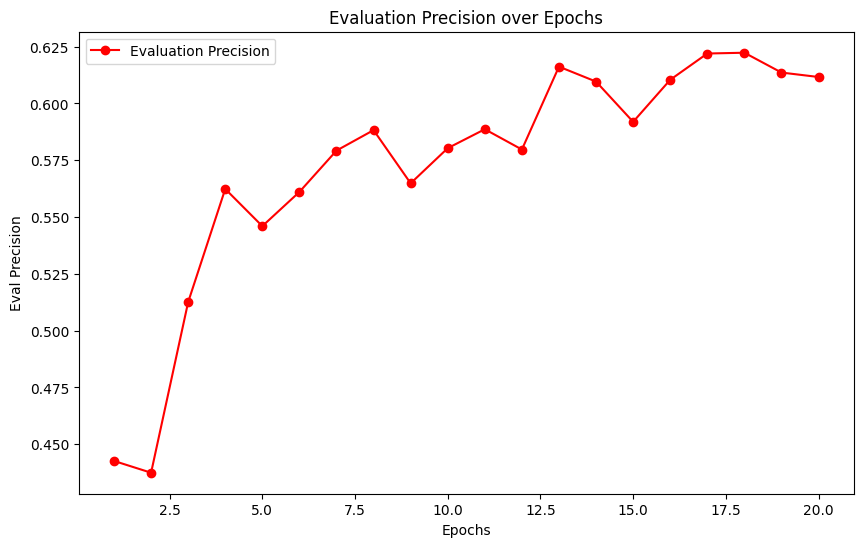

In [ ]:
import matplotlib.pyplot as plt

# Assuming log_history is your list of dictionaries with logged metrics
# Extract epochs and eval_loss_values, ensuring they correspond to entries with 'eval_loss'
eval_log_entries = [(log['epoch'], log['eval_precision']) for log in log_history if 'eval_precision' in log]
epochs, eval_precision_values = zip(*eval_log_entries)  # This unpacks the list of tuples into two tuples

# Creating the plot for Evaluation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, eval_precision_values, 'ro-', label='Evaluation Precision')
plt.title('Evaluation Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Eval Precision')
plt.legend()

plt.show()


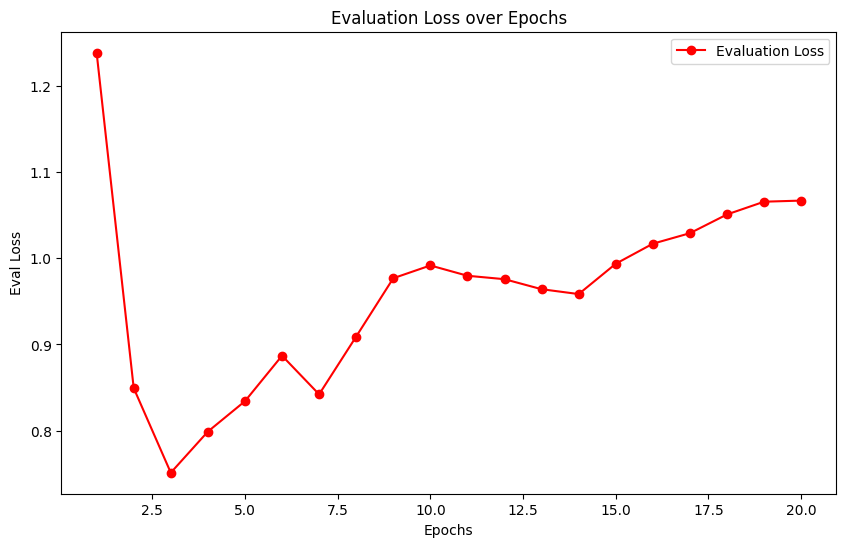

In [ ]:
# Assuming log_history is your list of dictionaries with logged metrics
# Extract epochs and eval_loss_values, ensuring they correspond to entries with 'eval_loss'
eval_log_entries = [(log['epoch'], log['eval_loss']) for log in log_history if 'eval_loss' in log]
epochs, eval_loss_values = zip(*eval_log_entries)  # This unpacks the list of tuples into two tuples

# Creating the plot for Evaluation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, eval_loss_values, 'ro-', label='Evaluation Loss')
plt.title('Evaluation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Eval Loss')
plt.legend()

plt.show()


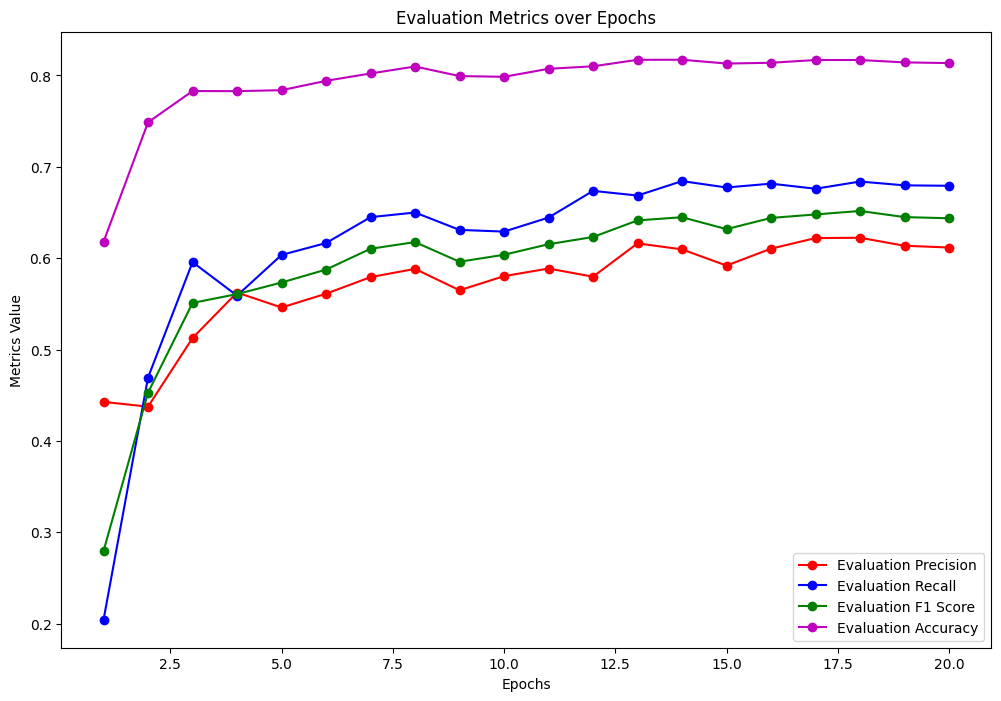

In [ ]:
import matplotlib.pyplot as plt

# Assuming log_history is your list of dictionaries with logged metrics

# Function to extract metrics and corresponding epochs
def extract_metric(log_history, metric_name):
    metric_log_entries = [(log['epoch'], log[metric_name]) for log in log_history if metric_name in log]
    if metric_log_entries:
        epochs, metric_values = zip(*metric_log_entries)  # Unpacks list of tuples
    else:
        epochs, metric_values = [], []
    return epochs, metric_values

# Extracting each metric
epochs_precision, eval_precision_values = extract_metric(log_history, 'eval_precision')
epochs_recall, eval_recall_values = extract_metric(log_history, 'eval_recall')
epochs_f1, eval_f1_values = extract_metric(log_history, 'eval_f1')
epochs_accuracy, eval_accuracy_values = extract_metric(log_history, 'eval_accuracy')

# Ensure we have a common set of epochs if all metrics are evaluated together
# This assumes all metrics are logged at the same epochs; adjust if not the case
common_epochs = set(epochs_precision) & set(epochs_recall) & set(epochs_f1) & set(epochs_accuracy)
epochs = sorted(list(common_epochs))

# Filter values to include only those from common epochs (if necessary)
precision_values = [val for epoch, val in zip(epochs_precision, eval_precision_values) if epoch in common_epochs]
recall_values = [val for epoch, val in zip(epochs_recall, eval_recall_values) if epoch in common_epochs]
f1_values = [val for epoch, val in zip(epochs_f1, eval_f1_values) if epoch in common_epochs]
accuracy_values = [val for epoch, val in zip(epochs_accuracy, eval_accuracy_values) if epoch in common_epochs]

# Creating the plot for Evaluation Metrics
plt.figure(figsize=(12, 8))
plt.plot(epochs, precision_values, 'ro-', label='Evaluation Precision')
plt.plot(epochs, recall_values, 'bo-', label='Evaluation Recall')
plt.plot(epochs, f1_values, 'go-', label='Evaluation F1 Score')
plt.plot(epochs, accuracy_values, 'mo-', label='Evaluation Accuracy')

plt.title('Evaluation Metrics over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')
plt.legend()

plt.show()


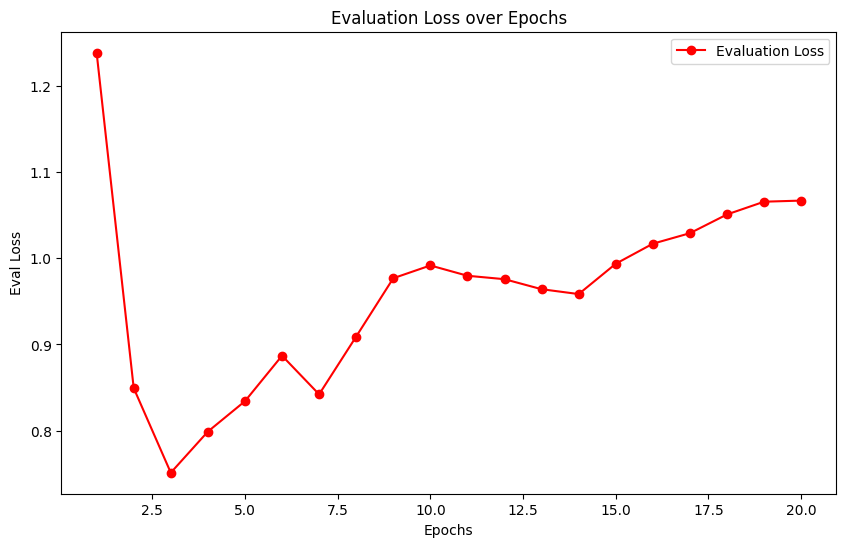

In [ ]:
import matplotlib.pyplot as plt

# Extracting epochs and eval_loss_values
epochs_loss, eval_loss_values = extract_metric(log_history, 'eval_loss')

# Plotting Evaluation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs_loss, eval_loss_values, 'ro-', label='Evaluation Loss')
plt.title('Evaluation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Eval Loss')
plt.legend()

plt.show()


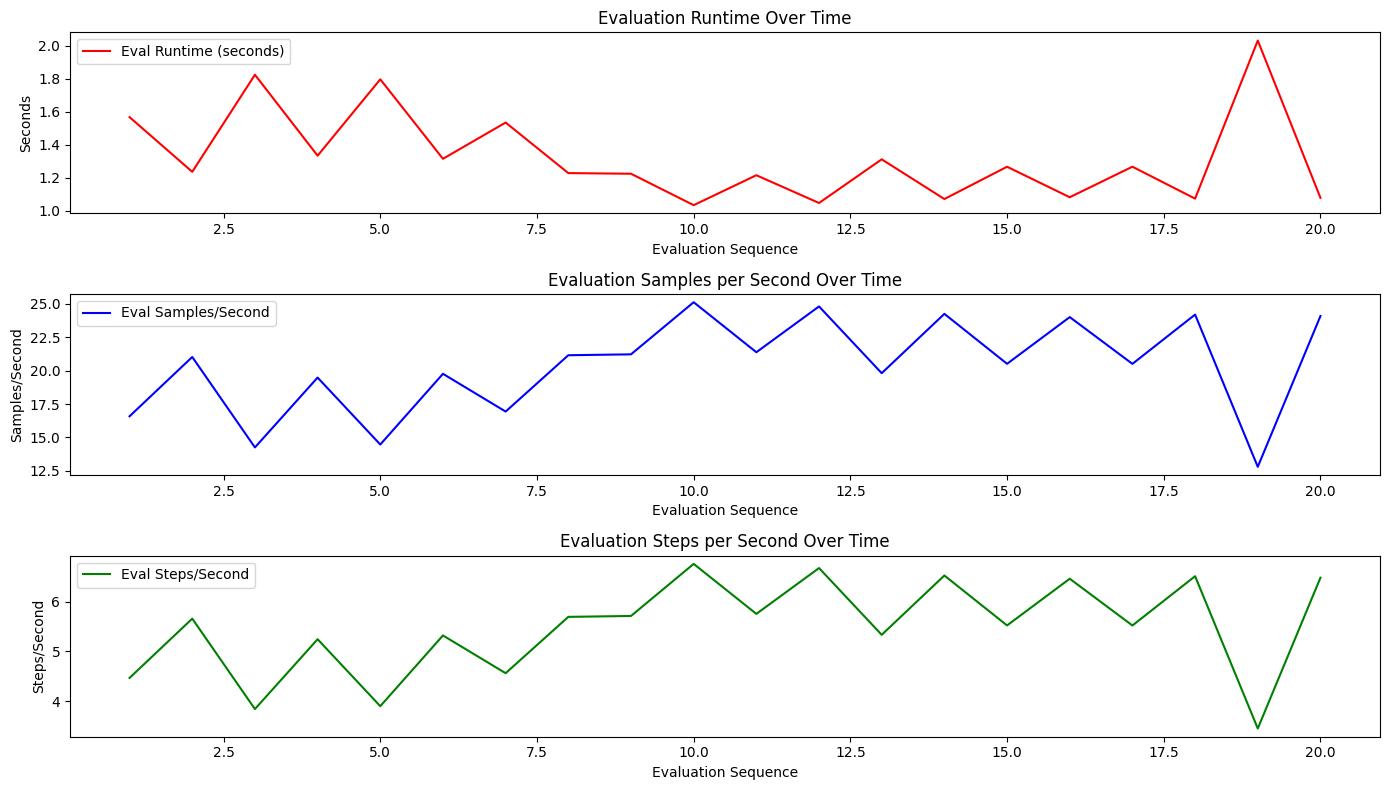

In [ ]:
import matplotlib.pyplot as plt

# Assuming log_history is your list of dictionaries with logged metrics

# Function to extract simple metrics that don't depend on epochs
def extract_simple_metric(log_history, metric_name):
    return [log[metric_name] for log in log_history if metric_name in log]

# Extracting runtime metrics
eval_runtime_values = extract_simple_metric(log_history, 'eval_runtime')
eval_samples_per_second_values = extract_simple_metric(log_history, 'eval_samples_per_second')
eval_steps_per_second_values = extract_simple_metric(log_history, 'eval_steps_per_second')

# Assuming each evaluation is sequential and equally spaced
evaluations = range(1, len(eval_runtime_values) + 1)

# Creating plots for Runtime Metrics
plt.figure(figsize=(14, 8))

# Plotting eval_runtime
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(evaluations, eval_runtime_values, 'r-', label='Eval Runtime (seconds)')
plt.xlabel('Evaluation Sequence')
plt.ylabel('Seconds')
plt.title('Evaluation Runtime Over Time')
plt.legend()

# Plotting eval_samples_per_second
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(evaluations, eval_samples_per_second_values, 'b-', label='Eval Samples/Second')
plt.xlabel('Evaluation Sequence')
plt.ylabel('Samples/Second')
plt.title('Evaluation Samples per Second Over Time')
plt.legend()

# Plotting eval_steps_per_second
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(evaluations, eval_steps_per_second_values, 'g-', label='Eval Steps/Second')
plt.xlabel('Evaluation Sequence')
plt.ylabel('Steps/Second')
plt.title('Evaluation Steps per Second Over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np


def compute_metrics(eval_preds):
    predictions, labels = eval_preds
    # Assuming pred_logits are logits, convert to label IDs; skip if already label IDs
    #predictions = np.argmax(pred_logits, axis=2)

    true_predictions = [
        [label_list[p] for p, l in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    true_labels = [
        [label_list[l] for l in label if l != -100]
        for label in labels
    ]

    # Compute overall scores (if needed)
    precision = precision_score(true_labels, true_predictions)
    recall = recall_score(true_labels, true_predictions)
    f1 = f1_score(true_labels, true_predictions)

    # Compute detailed classification report
    detailed_report = classification_report(true_labels, true_predictions)
    # Compute confusion matrix

    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "classification_report": detailed_report
    }



# If you have a test dataset included in your Trainer:
test_results = trainer.evaluate(tokenized_datasets["test"])

# If you're manually evaluating:
predictions, labels, _ = trainer.predict(tokenized_datasets["test"])
# Flatten outputs for metric computation if necessary
predictions = np.argmax(predictions, axis=2)  # Adjust based on your specific needs
metrics = compute_metrics((predictions, labels))


In [ ]:
#print(predictions.shape)


In [ ]:
print(metrics["classification_report"])


                  precision    recall  f1-score   support

         ANATOMY       0.76      0.68      0.72       192
            CHEM       0.68      0.86      0.76       367
          DEVICE       0.33      0.07      0.12        28
            DISO       0.67      0.73      0.70       459
         FINDING       0.33      0.48      0.39       202
INJURY_POISONING       0.00      0.00      0.00         0
         LABPROC       0.53      0.82      0.64        95
            PHYS       0.27      0.39      0.32        75

       micro avg       0.58      0.69      0.63      1418
       macro avg       0.45      0.50      0.46      1418
    weighted avg       0.60      0.69      0.64      1418



In [ ]:
import pandas as pd

# Assuming metrics["classification_report"] is your classification report as a string
report_lines = metrics["classification_report"].split('\n')

# Define lists to hold the parsed data
data = []
# Adjust the loop to process all relevant lines
for line in report_lines[2:]:  # Skip only the header lines
    row = []
    for word in line.split():
        row.append(word)
    if row:  # Avoid adding empty rows
        # Check if the line corresponds to avg/total rows
        if len(row) == 5:
            data.append(row)
        elif len(row) > 5:
            # This handles "avg" rows which have an additional space and split the avg type and its metrics
            avg_row = [row[0] + " " + row[1]] + row[2:]
            data.append(avg_row)

# Adjust column names according to your classification report structure
columns = ["Class", "Precision", "Recall", "F1-score", "Support"]
report_df = pd.DataFrame(data, columns=columns)
report_df["Support"] = report_df["Support"].astype(int)  # Convert support to integers

print(report_df)


               Class Precision Recall F1-score  Support
0            ANATOMY      0.76   0.68     0.72      192
1               CHEM      0.68   0.86     0.76      367
2             DEVICE      0.33   0.07     0.12       28
3               DISO      0.67   0.73     0.70      459
4            FINDING      0.33   0.48     0.39      202
5   INJURY_POISONING      0.00   0.00     0.00        0
6            LABPROC      0.53   0.82     0.64       95
7               PHYS      0.27   0.39     0.32       75
8          micro avg      0.58   0.69     0.63     1418
9          macro avg      0.45   0.50     0.46     1418
10      weighted avg      0.60   0.69     0.64     1418


              Class Precision Recall F1-score  Support
0           ANATOMY      0.76   0.68     0.72      192
1              CHEM      0.68   0.86     0.76      367
2            DEVICE      0.33   0.07     0.12       28
3              DISO      0.67   0.73     0.70      459
4           FINDING      0.33   0.48     0.39      202
5  INJURY_POISONING      0.00   0.00     0.00        0
6           LABPROC      0.53   0.82     0.64       95
7              PHYS      0.27   0.39     0.32       75


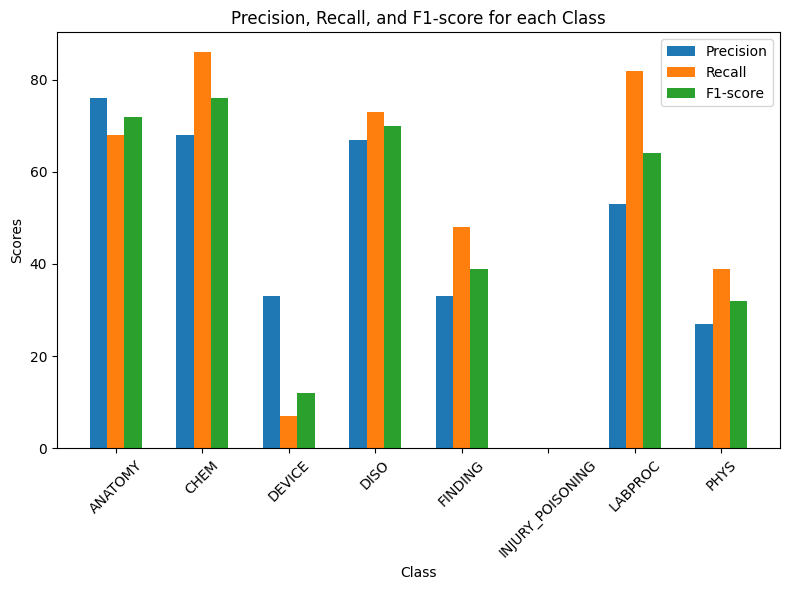

In [ ]:
# Filtering out the average values to focus on class-wise metrics
class_df = report_df[~report_df['Class'].str.contains("avg")]
print(class_df)
class_df = class_df.copy()

# Assuming class_df is the user's DataFrame and converting the relevant columns to float
class_df["Precision"] = class_df["Precision"].astype(float)*100
class_df["Recall"] = class_df["Recall"].astype(float)*100
class_df["F1-score"] = class_df["F1-score"].astype(float)*100

bar_width = 0.2
index = np.arange(len(class_df["Class"]))

# Now, plotting the bar chart with the corrected data types
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = plt.bar(index, class_df["Precision"], bar_width, label="Precision")
bars2 = plt.bar(index + bar_width, class_df["Recall"], bar_width, label="Recall")
bars3 = plt.bar(index + 2*bar_width, class_df["F1-score"], bar_width, label="F1-score")

plt.xlabel("Class")
plt.ylabel("Scores")
plt.title("Precision, Recall, and F1-score for each Class")
plt.xticks(index + bar_width, class_df["Class"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Using report_df from the DataFrame example
report_df.to_csv("classification_report.csv")
# or for Excel
#report_df.to_excel("classification_report.xlsx")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

def confusion_matrix_plot(eval_preds):
    predictions, labels = eval_preds

    # Assuming predictions are already label IDs
    predictions, labels = eval_preds
    # Assuming pred_logits are logits, convert to label IDs; skip if already label IDs
    #predictions = np.argmax(pred_logits, axis=2)

    true_predictions = [
        [label_list[p] for p, l in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    true_labels = [
        [label_list[l] for l in label if l != -100]
        for label in labels
    ]


    # Flatten the predictions and labels for confusion matrix computation
    flat_true_labels = [item for sublist in true_labels for item in sublist]
    flat_predictions = [item for sublist in true_predictions for item in sublist]

    cm = confusion_matrix(flat_true_labels, flat_predictions, labels=label_list)

    return cm





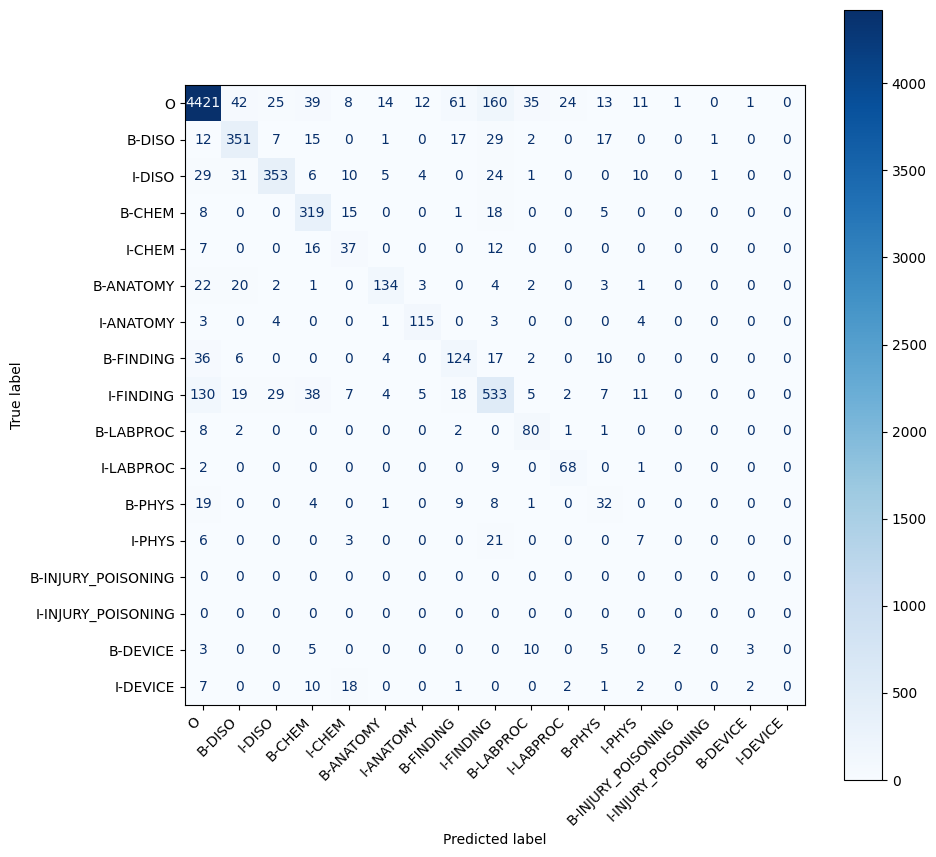

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix_plot((predictions, labels))


# Optionally, display the confusion matrix (comment out if not feasible in your environment)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)

# Here are the changes:
# - Change color map to 'viridis'
# - Add values inside the cells (with color contrast for better readability)
# - Change edge color of the matrix cells to make them more distinct
# - Optionally, you can adjust the linewidth of the edges
disp.plot(cmap='Blues', ax=ax, values_format='g', colorbar=True)

# Rotate the labels for better readability
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels with a horizontal alignment to the right
plt.yticks(rotation=0)   # Keep y-axis labels as is, adjust if needed

plt.show()


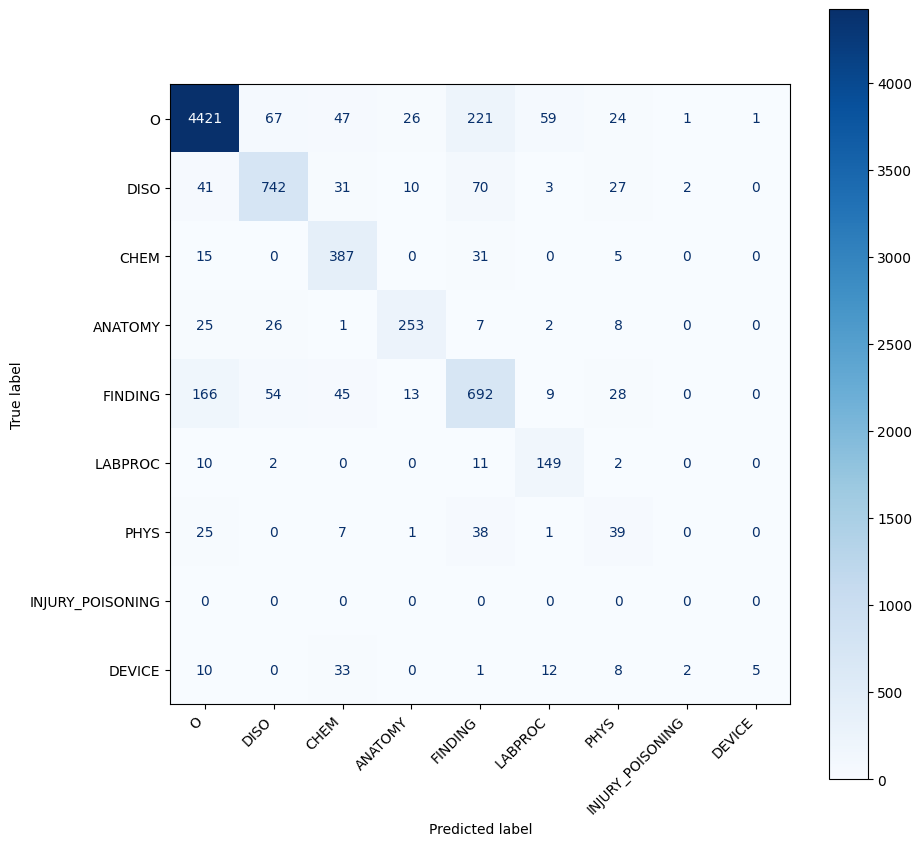

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

def merge_classes(labels):
    # This function removes 'B-' and 'I-' prefixes from labels to merge classes
    merged_labels = []
    for label in labels:
        if label.startswith("B-") or label.startswith("I-"):
            merged_labels.append(label[2:])  # Remove the first two characters ('B-' or 'I-')
        else:
            merged_labels.append(label)
    return merged_labels

def unique_ordered_merge_classes(labels):
    # This function removes 'B-' and 'I-' prefixes from labels to merge classes while maintaining the original order
    unique = dict.fromkeys([label[2:] if label.startswith('B-') or label.startswith('I-') else label for label in labels])
    return list(unique)

def confusion_matrix_plot(eval_preds):
    predictions, labels = eval_preds

    # Assuming predictions are already label IDs, adapt them for B-I merging
    true_predictions = [
        merge_classes([label_list[p] for p, l in zip(prediction, label) if l != -100])
        for prediction, label in zip(predictions, labels)
    ]

    true_labels = [
        merge_classes([label_list[l] for l in label if l != -100])
        for label in labels
    ]

    # Flatten the predictions and labels for confusion matrix computation
    flat_true_labels = [item for sublist in true_labels for item in sublist]
    flat_predictions = [item for sublist in true_predictions for item in sublist]

    # Update label_list to reflect merged classes, ensuring unique sorted labels
    #merged_label_list = sorted(set(merge_classes(label_list)))
    merged_label_list = unique_ordered_merge_classes(label_list)

    cm = confusion_matrix(flat_true_labels, flat_predictions, labels=merged_label_list)

    return cm, merged_label_list

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm, merged_label_list = confusion_matrix_plot((predictions, labels))


# Optionally, display the confusion matrix (comment out if not feasible in your environment)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=merged_label_list)

# Here are the changes:
# - Change color map to 'viridis'
# - Add values inside the cells (with color contrast for better readability)
# - Change edge color of the matrix cells to make them more distinct
# - Optionally, you can adjust the linewidth of the edges
disp.plot(cmap='Blues', ax=ax, values_format='g', colorbar=True)

# Rotate the labels for better readability
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels with a horizontal alignment to the right
plt.yticks(rotation=0)   # Keep y-axis labels as is, adjust if needed

plt.show()


In [ ]:
model.save_pretrained("ner_model")

In [ ]:
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

In [ ]:
id2label = {
    str(i): label for i,label in enumerate(label_list)
}
label2id = {
    label: str(i) for i,label in enumerate(label_list)
}

In [ ]:
import json

In [ ]:
config = json.load(open("ner_model/config.json"))

In [ ]:
config["id2label"] = id2label
config["label2id"] = label2id

In [ ]:
json.dump(config, open("ner_model/config.json","w"))

In [ ]:
model_fine_tuned = AutoModelForTokenClassification.from_pretrained("ner_model")

In [ ]:
from transformers import pipeline

In [ ]:
nlp = pipeline("ner", model=model_fine_tuned, tokenizer=tokenizer)


example = "To analyze epileptic seizure aggravation associated with antiepileptic drugs (AED) in adult patients."

ner_results = nlp(example)

print(ner_results)

[{'entity': 'B-FINDING', 'score': 0.99649185, 'index': 3, 'word': 'ep', 'start': 11, 'end': 13}, {'entity': 'B-FINDING', 'score': 0.9958949, 'index': 4, 'word': '##ile', 'start': 13, 'end': 16}, {'entity': 'B-FINDING', 'score': 0.9969741, 'index': 5, 'word': '##ptic', 'start': 16, 'end': 20}, {'entity': 'I-FINDING', 'score': 0.9978738, 'index': 6, 'word': 'seizure', 'start': 21, 'end': 28}, {'entity': 'I-FINDING', 'score': 0.9988612, 'index': 7, 'word': 'ag', 'start': 29, 'end': 31}, {'entity': 'I-FINDING', 'score': 0.99892324, 'index': 8, 'word': '##gra', 'start': 31, 'end': 34}, {'entity': 'I-FINDING', 'score': 0.9988483, 'index': 9, 'word': '##vation', 'start': 34, 'end': 40}, {'entity': 'B-CHEM', 'score': 0.99845254, 'index': 12, 'word': 'anti', 'start': 57, 'end': 61}, {'entity': 'B-CHEM', 'score': 0.99852836, 'index': 13, 'word': '##ep', 'start': 61, 'end': 63}, {'entity': 'B-CHEM', 'score': 0.99834406, 'index': 14, 'word': '##ile', 'start': 63, 'end': 66}, {'entity': 'B-CHEM', '